✅ Data loaded successfully. Shape: (779425, 8)
Created 'TotalAmount' column.
   InvoiceNo StockCode                          Description  Quantity  \
0     489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1     489434    79323P                   PINK CHERRY LIGHTS        12   
2     489434    79323W                  WHITE CHERRY LIGHTS        12   
3     489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4     489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0 2009-12-01 07:45:00       6.95     13085.0  United Kingdom         83.4   
1 2009-12-01 07:45:00       6.75     13085.0  United Kingdom         81.0   
2 2009-12-01 07:45:00       6.75     13085.0  United Kingdom         81.0   
3 2009-12-01 07:45:00       2.10     13085.0  United Kingdom        100.8   
4 2009-12-01 07:45:00       1.25     13085.0  United Kingdom         30.0   

  YearMonth  Hour Day

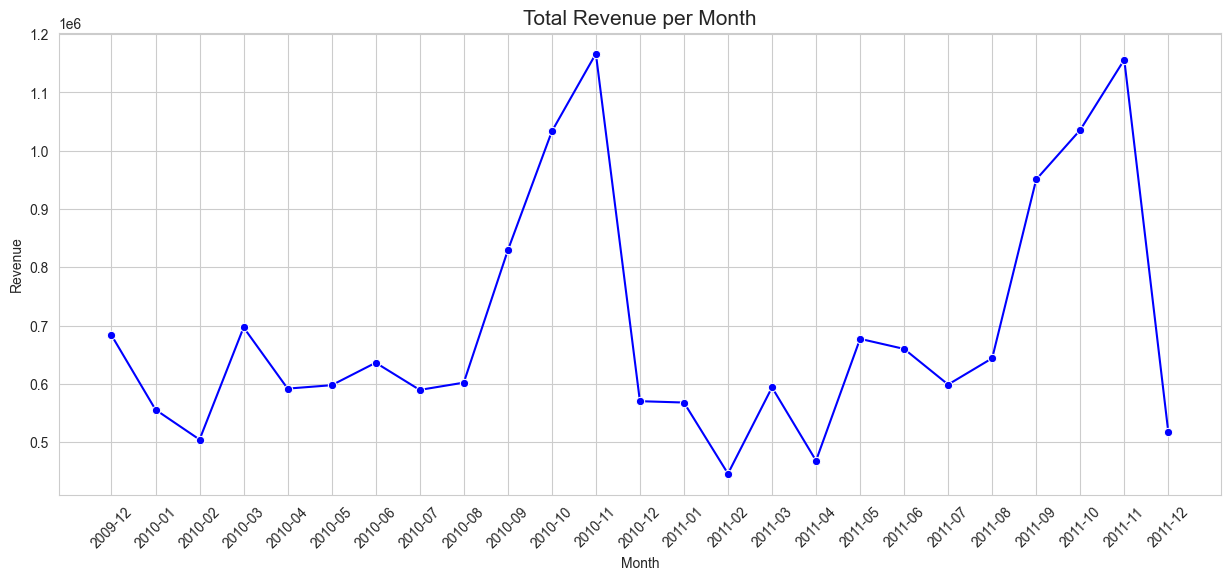

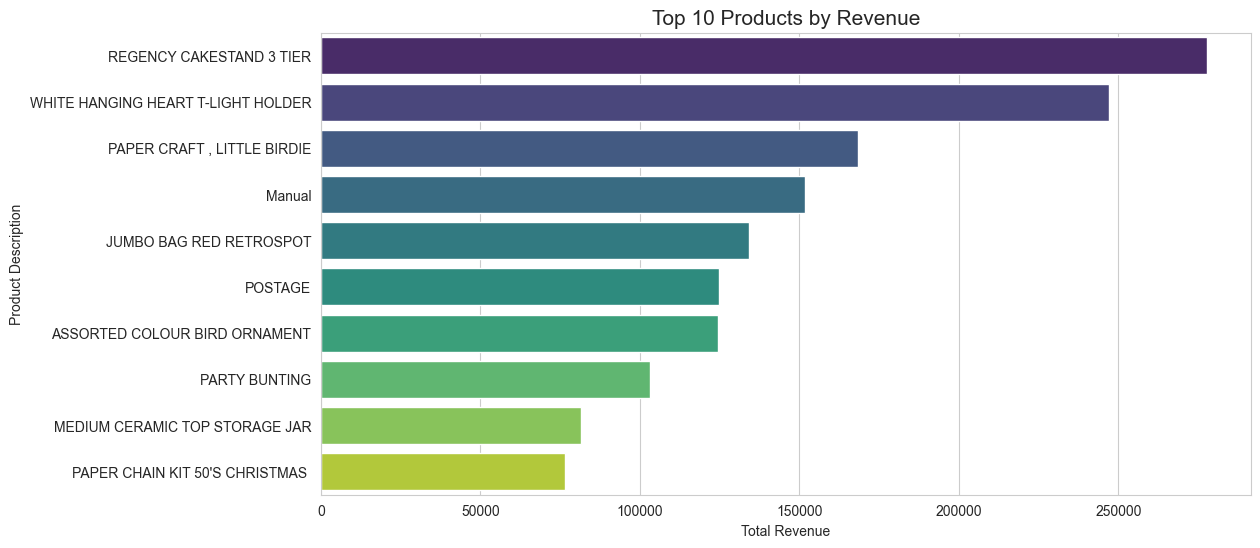

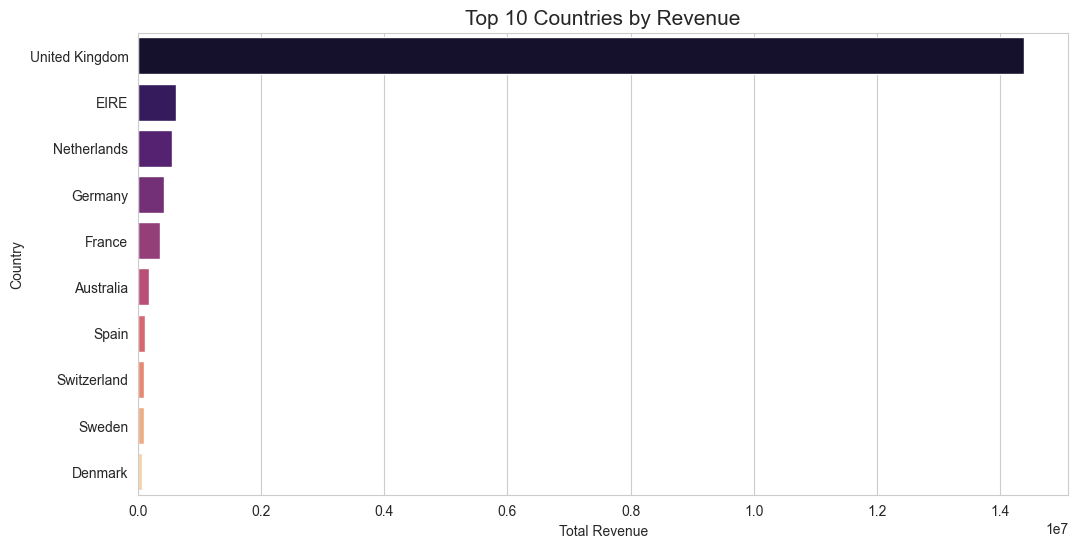

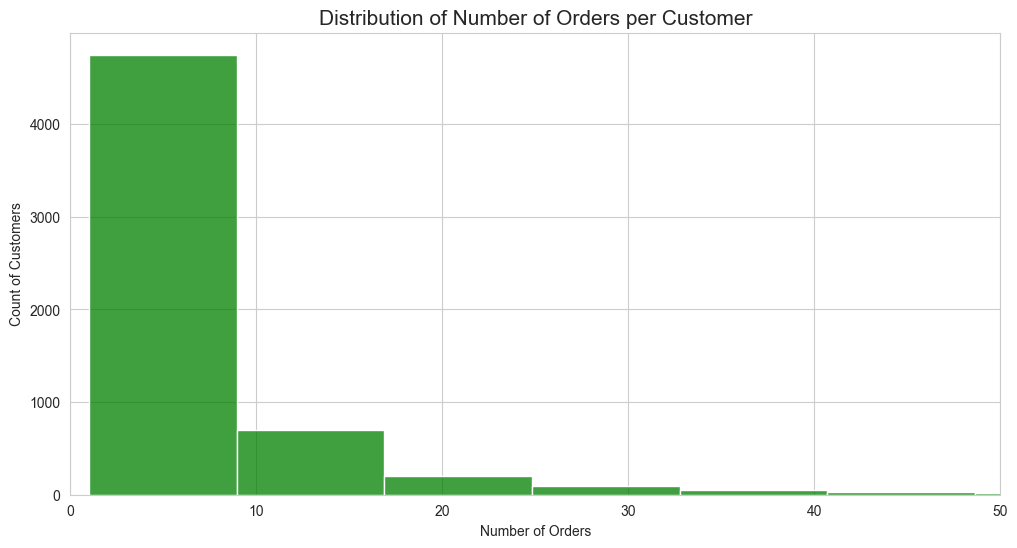

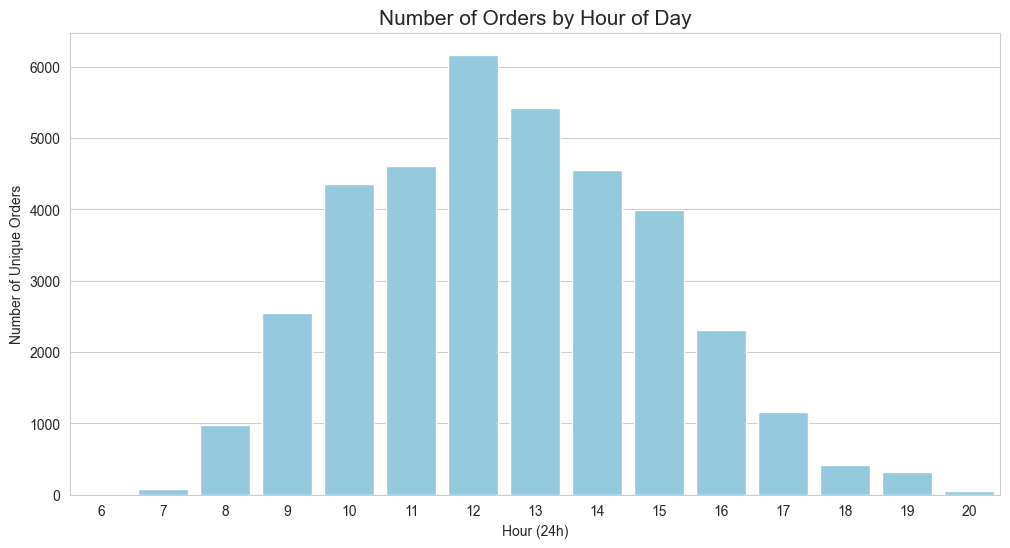

In [2]:
# %% [markdown]
# # Step 3: Exploratory Data Analysis (EDA) & Visualization
#
# This notebook focuses on visualizing the cleaned e-commerce dataset to understand trends, 
# customer behavior, and product performance.
#
# **Input:** Processed data from Step 2.
# **Output:** Visualizations and insights.

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# %%
# 1. Load the Processed Data
# ==========================================
data_path = "../data/processed/cleaned_transactions.csv" 

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    # Ensure InvoiceDate is datetime objects
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    print(f"✅ Data loaded successfully. Shape: {df.shape}")
else:
    print(f"❌ File not found at {data_path}. Please check the path.")

# %%
# 2. Feature Engineering for Analysis
# ==========================================
if 'TotalAmount' not in df.columns:
    df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
    print("Created 'TotalAmount' column.")

# Extracting date components
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

print(df.head())

# %% [markdown]
# ### 3.1 Sales Trends Over Time
# How has revenue changed over the months?

# %%
monthly_sales = df.groupby('YearMonth')['TotalAmount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='TotalAmount', marker='o', color='b')
plt.title('Total Revenue per Month', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# %% [markdown]
# ### 3.2 Top Selling Products
# Which items generate the most revenue?

# %%
top_products = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
# FIX: Assigned 'hue' and set 'legend=False' to satisfy the deprecation warning
sns.barplot(
    x=top_products.values, 
    y=top_products.index, 
    hue=top_products.index, 
    palette='viridis', 
    legend=False
)
plt.title('Top 10 Products by Revenue', fontsize=15)
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()

# %% [markdown]
# ### 3.3 Revenue by Country
# Where are the majority of sales coming from?

# %%
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
# FIX: Assigned 'hue' and set 'legend=False' to satisfy the deprecation warning
sns.barplot(
    x=country_sales.values, 
    y=country_sales.index, 
    hue=country_sales.index, 
    palette='magma', 
    legend=False
)
plt.title('Top 10 Countries by Revenue', fontsize=15)
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

# %% [markdown]
# ### 3.4 Customer Purchase Behavior
# Distribution of number of orders per customer.

# %%
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(12, 6))
sns.histplot(customer_orders, bins=50, kde=False, color='green')
plt.title('Distribution of Number of Orders per Customer', fontsize=15)
plt.xlabel('Number of Orders')
plt.ylabel('Count of Customers')
plt.xlim(0, 50) 
plt.show()

# %%
# 5. Hourly Sales Trend
# When do most orders occur?

# %%
hourly_sales = df.groupby('Hour')['InvoiceNo'].nunique()

plt.figure(figsize=(12, 6))
# Using a single color here, so no hue/palette changes needed
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, color='skyblue')
plt.title('Number of Orders by Hour of Day', fontsize=15)
plt.xlabel('Hour (24h)')
plt.ylabel('Number of Unique Orders')
plt.show()

In [3]:
# %%
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define Directory
figures_dir = "/Users/maneeshkoti/Documents/ecommerce-churn-prediction/reports/figures"
os.makedirs(figures_dir, exist_ok=True)

# 2. Save Monthly Revenue Trend (New Name: eda_monthly_revenue.png)
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='TotalAmount', marker='o', color='b')
plt.title('Total Revenue per Month', fontsize=15)
plt.xticks(rotation=45)
plt.savefig(os.path.join(figures_dir, "eda_monthly_revenue.png"), bbox_inches='tight')
plt.close()

# 3. Save Top Products (New Name: eda_top_products.png)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='viridis', legend=False)
plt.title('Top 10 Products by Revenue', fontsize=15)
plt.savefig(os.path.join(figures_dir, "eda_top_products.png"), bbox_inches='tight')
plt.close()

# 4. Save Revenue by Country (New Name: eda_revenue_by_country.png)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.values, y=country_sales.index, hue=country_sales.index, palette='magma', legend=False)
plt.title('Top 10 Countries by Revenue', fontsize=15)
plt.savefig(os.path.join(figures_dir, "eda_revenue_by_country.png"), bbox_inches='tight')
plt.close()

# 5. Save Order Distribution (New Name: eda_order_freq_dist.png)
# This avoids overwriting your existing 'churn_distribution.png'
plt.figure(figsize=(12, 6))
sns.histplot(customer_orders, bins=50, kde=False, color='green')
plt.title('Distribution of Number of Orders per Customer', fontsize=15)
plt.xlim(0, 50)
plt.savefig(os.path.join(figures_dir, "eda_order_freq_dist.png"), bbox_inches='tight')
plt.close()

# 6. Save Hourly Sales Trend (New Name: eda_hourly_trend.png)
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, color='skyblue')
plt.title('Number of Orders by Hour of Day', fontsize=15)
plt.savefig(os.path.join(figures_dir, "eda_hourly_trend.png"), bbox_inches='tight')
plt.close()

print(f"✅ Success! New EDA images saved with 'eda_' prefix in: {figures_dir}")

✅ Success! New EDA images saved with 'eda_' prefix in: /Users/maneeshkoti/Documents/ecommerce-churn-prediction/reports/figures
